Correlation coefficient with Low Pass Filtered Output: -0.2879890665791803
Correlation coefficient with High Pass Filtered Output: -0.0021771591542695977
Correlation coefficient with Band Pass Filtered Output: 0.008725263511266993
Band Pass Filtered Output best matches the given Output signal.


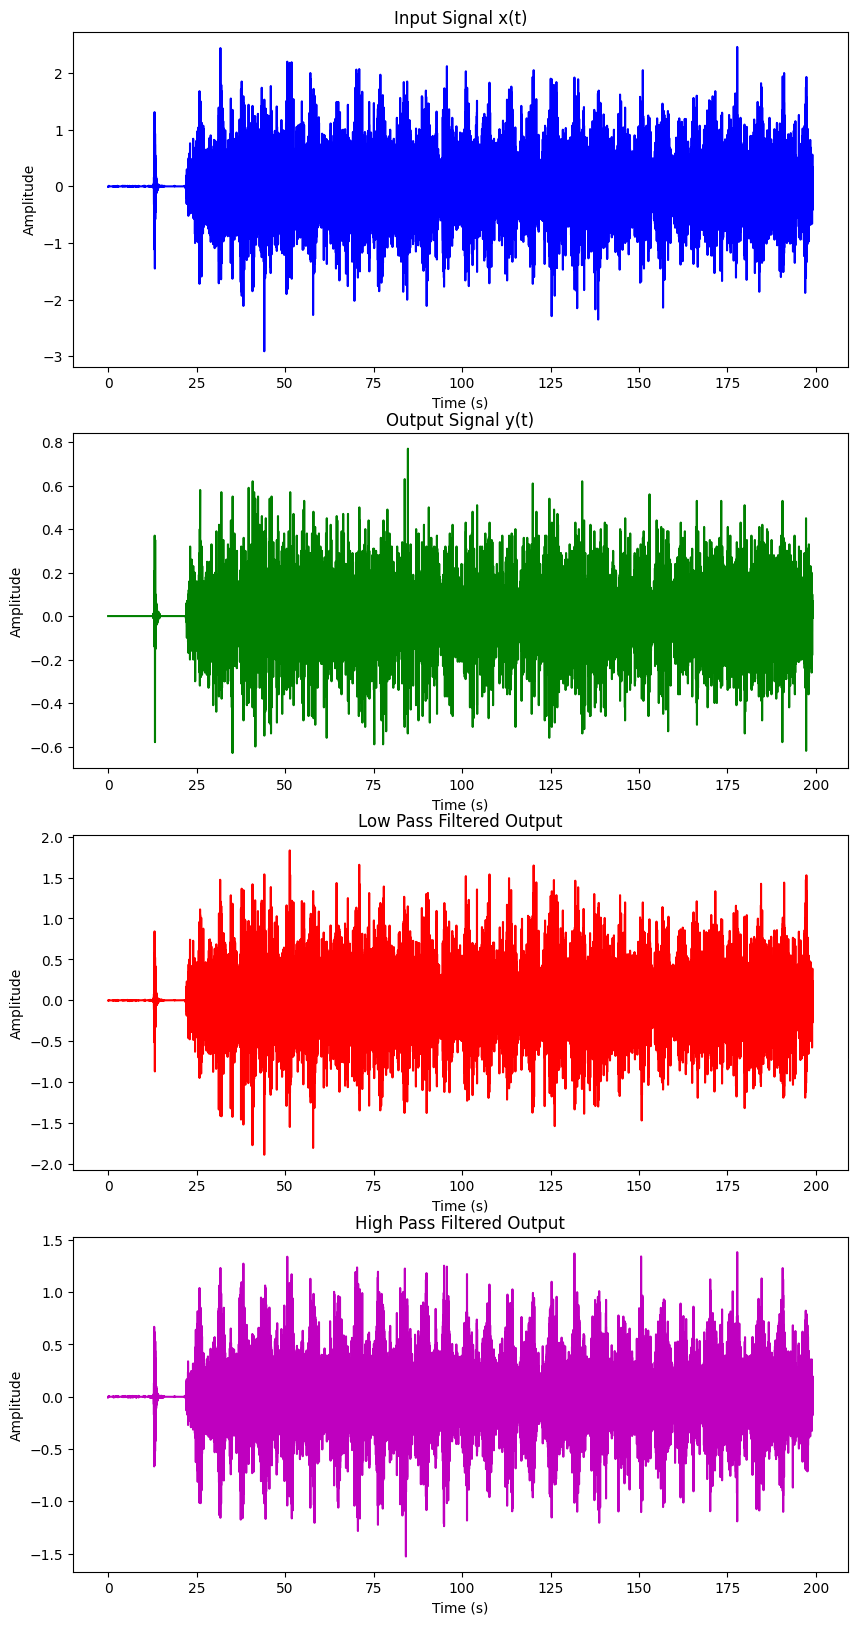

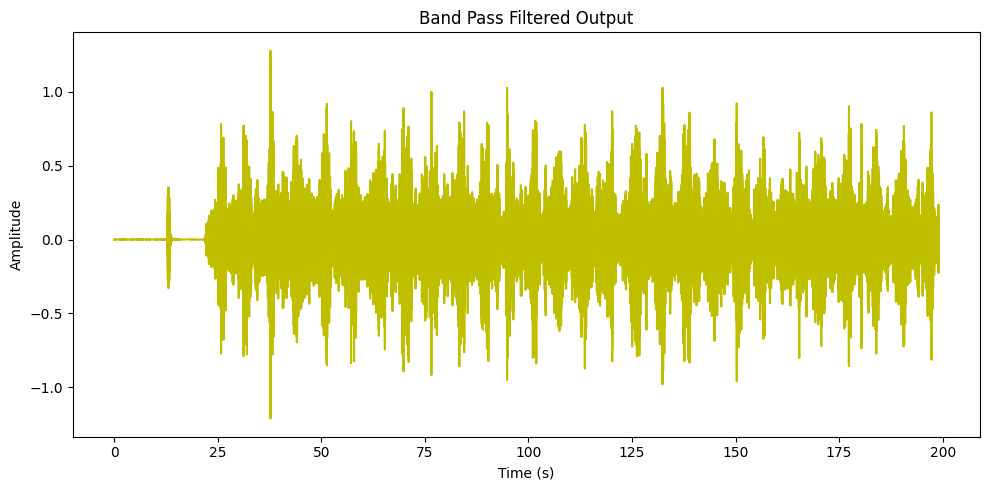

In [11]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define the input signal x(t) from the input text file
def read_input_signal(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        x = [float(line.strip()) for line in lines]
    return np.array(x)

# Define the given output signal y(t) from the output text file
def read_output_signal(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        y = [float(line.strip()) for line in lines]
    return np.array(y)

# Define the designed filters
def low_pass_filter(fc, fs, num_taps=101):
    nyquist = 0.5 * fs
    cutoff = fc / nyquist
    taps = signal.firwin(num_taps, cutoff, window='hamming')
    return taps

def high_pass_filter(fc, fs, num_taps=101):
    nyquist = 0.5 * fs
    cutoff = fc / nyquist
    taps = signal.firwin(num_taps, cutoff, pass_zero=False, window='hamming')
    return taps

def band_pass_filter(fc_low, fc_high, fs, num_taps=101):
    nyquist = 0.5 * fs
    low_cutoff = fc_low / nyquist
    high_cutoff = fc_high / nyquist
    taps = signal.firwin(num_taps, [low_cutoff, high_cutoff], pass_zero=False, window='hamming')
    return taps

# Convolve the filters with the input signal to obtain filtered outputs
def apply_filter(filter_taps, input_signal):
    filtered_output = signal.convolve(input_signal, filter_taps, mode='same')
    return filtered_output

# Calculate correlation coefficient
def calculate_correlation(signal1, signal2):
    correlation_coefficient = np.corrcoef(signal1, signal2)[0, 1]
    return correlation_coefficient

# Main function
if __name__ == "__main__":
    # Read input signal x(t) from the input text file
    input_signal_filename = "INPUT-SIGNAL-X(t).txt"
    x = read_input_signal(input_signal_filename)

    # Read output signal y(t) from the output text file
    output_signal_filename = "OUTPUT-SIGNAL-Y(t).txt"
    y = read_output_signal(output_signal_filename)

    # Define parameters
    fs = 1000  # Sampling frequency
    fc_lp = 50  # Cut-off frequency for Low Pass Filter
    fc_hp = 50  # Cut-off frequency for High Pass Filter
    fc_bp_low = 40  # Lower cut-off frequency for Band Pass Filter
    fc_bp_high = 60  # Higher cut-off frequency for Band Pass Filter

    # Generate filter coefficients
    lp_filter = low_pass_filter(fc_lp, fs)
    hp_filter = high_pass_filter(fc_hp, fs)
    bp_filter = band_pass_filter(fc_bp_low, fc_bp_high, fs)

    # Apply filters to the input signal
    y_lp = apply_filter(lp_filter, x)
    y_hp = apply_filter(hp_filter, x)
    y_bp = apply_filter(bp_filter, x)

    # Calculate correlation coefficients
    corr_lp = calculate_correlation(y_lp, y)
    corr_hp = calculate_correlation(y_hp, y)
    corr_bp = calculate_correlation(y_bp, y)

    # Printing correlation coefficients
    print("Correlation coefficient with Low Pass Filtered Output:", corr_lp)
    print("Correlation coefficient with High Pass Filtered Output:", corr_hp)
    print("Correlation coefficient with Band Pass Filtered Output:", corr_bp)

    # Identifying which filtered output best matches the given output signal
    best_match = max(corr_lp, corr_hp, corr_bp)
    if best_match == corr_lp:
        print("Low Pass Filtered Output best matches the given Output signal.")
    elif best_match == corr_hp:
        print("High Pass Filtered Output best matches the given Output signal.")
    else:
        print("Band Pass Filtered Output best matches the given Output signal.")

    # Plot signals
    t = np.arange(len(x)) / fs

    plt.figure(figsize=(10, 20))

    plt.subplot(4, 1, 1)
    plt.plot(t, x, 'b')
    plt.title('Input Signal x(t)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(4, 1, 2)
    plt.plot(t, y, 'g')
    plt.title('Output Signal y(t)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(4, 1, 3)
    plt.plot(t, y_lp, 'r')
    plt.title('Low Pass Filtered Output')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(4, 1, 4)
    plt.plot(t, y_hp, 'm')
    plt.title('High Pass Filtered Output')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.figure(figsize=(10,5))
    plt.plot(t, y_bp, 'y')
    plt.title('Band Pass Filtered Output')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()
